In [1]:
# import Librabies
import pandas_datareader as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

In [12]:
from prophet import Prophet

In [2]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2020,12,30)

crypto_currency = 'BTC'
against_currency = 'USD'

In [3]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', start, end)

In [5]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2020-12-26,26718.070312,24522.689453,24677.015625,26437.037109,4.833265e+10,26437.037109
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594


In [6]:
data = data.reset_index()

In [7]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...,...
2288,2020-12-26,26718.070312,24522.689453,24677.015625,26437.037109,4.833265e+10,26437.037109
2289,2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922
2290,2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594
2291,2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500


In [9]:
data[['ds', 'y']] = data[['Date', 'Adj Close']]

In [10]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,2014-09-16,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,2014-09-17,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,2014-09-18,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,2014-09-19,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,2014-09-20,398.821014
...,...,...,...,...,...,...,...,...,...
2288,2020-12-26,26718.070312,24522.689453,24677.015625,26437.037109,4.833265e+10,26437.037109,2020-12-26,26437.037109
2289,2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922,2020-12-27,26272.294922
2290,2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594,2020-12-28,27084.808594
2291,2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500,2020-12-29,27362.437500


In [13]:
model = Prophet()

In [14]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(365)

In [16]:
forecast = model.predict(future)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-16,124.413071,-2214.282995,1965.750957,124.413071,124.413071,-128.547690,-128.547690,-128.547690,7.702046,7.702046,7.702046,-136.249737,-136.249737,-136.249737,0.0,0.0,0.0,-4.134619
1,2014-09-17,125.000273,-2079.084764,2097.085683,125.000273,125.000273,-141.549333,-141.549333,-141.549333,13.172486,13.172486,13.172486,-154.721818,-154.721818,-154.721818,0.0,0.0,0.0,-16.549059
2,2014-09-18,125.587475,-2040.806002,1877.885635,125.587475,125.587475,-186.791869,-186.791869,-186.791869,-14.883109,-14.883109,-14.883109,-171.908760,-171.908760,-171.908760,0.0,0.0,0.0,-61.204394
3,2014-09-19,126.174678,-2095.220900,2042.572937,126.174678,126.174678,-197.958178,-197.958178,-197.958178,-10.219985,-10.219985,-10.219985,-187.738194,-187.738194,-187.738194,0.0,0.0,0.0,-71.783501
4,2014-09-20,126.761880,-2127.268019,2060.046027,126.761880,126.761880,-208.156404,-208.156404,-208.156404,-5.992697,-5.992697,-5.992697,-202.163707,-202.163707,-202.163707,0.0,0.0,0.0,-81.394524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2021-12-26,18994.904409,15188.670093,26467.513170,13839.623887,24019.433773,1878.752109,1878.752109,1878.752109,13.794368,13.794368,13.794368,1864.957741,1864.957741,1864.957741,0.0,0.0,0.0,20873.656519
2648,2021-12-27,19008.735105,14980.481237,26323.035674,13840.984342,24072.033129,1795.199568,1795.199568,1795.199568,-3.573110,-3.573110,-3.573110,1798.772677,1798.772677,1798.772677,0.0,0.0,0.0,20803.934673
2649,2021-12-28,19022.565801,15257.519415,26333.214229,13842.344797,24124.112610,1732.443808,1732.443808,1732.443808,7.702046,7.702046,7.702046,1724.741761,1724.741761,1724.741761,0.0,0.0,0.0,20755.009609
2650,2021-12-29,19036.396497,14840.389954,26262.328317,13831.758955,24175.199323,1657.000881,1657.000881,1657.000881,13.172486,13.172486,13.172486,1643.828395,1643.828395,1643.828395,0.0,0.0,0.0,20693.397378


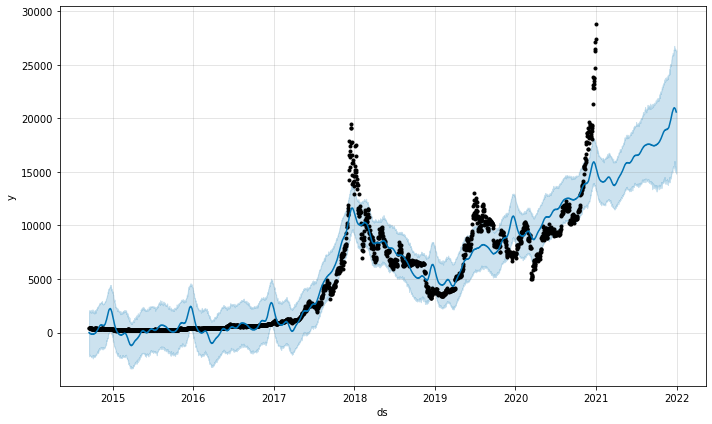

In [18]:
model.plot(forecast)
plt.show()

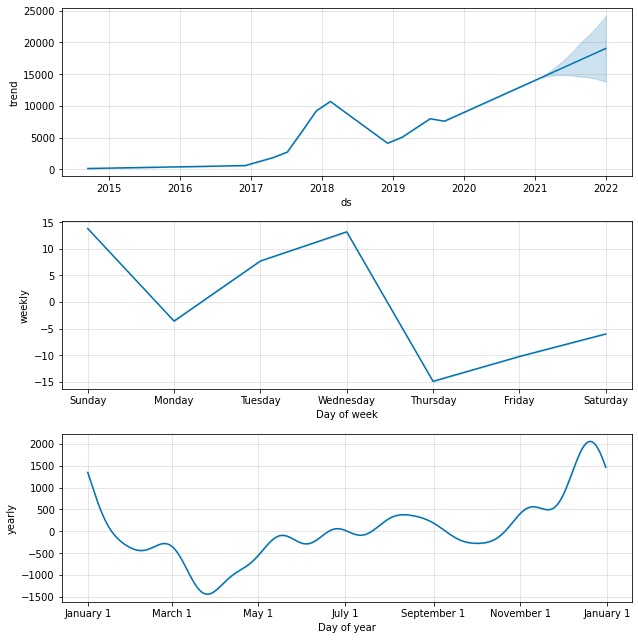

In [20]:
model.plot_components(forecast)
plt.show()